## Problem statement
Implement a KNN model to classify the animals and predict they are of which animal type. The 7 Class Types are: Mammal, Bird, Reptile, Fish, Amphibian, Bug and Invertebrate
## Importing the libraries

In [1]:
from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sn
import pandas as pd
from sklearn.model_selection import GridSearchCV,train_test_split
import numpy as np
import imblearn
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

### Loading the dataset

In [2]:
zoo = pd.read_csv("zoo.csv")

In [3]:
zoo.head(5)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


#### We can just peek into few data points by using head function of pandas. By default, head function return top 5 values

### Data Insights

In [4]:
zoo.shape

(101, 18)

In [5]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


### Observations :-
#### We can see there are no null values in our dataset. There are 16 variables with various traits to describe the animals. The traits are hair, feathers, eggs, milk, .......domestic,catsize.
#### The purpose for this dataset is to be able to predict the classification(type) of the animals, based upon the variables.¶


In [6]:
zoo[zoo.duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


#### There are no duplicate values in our data
### Summary statistics

In [7]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


#### We could see that all the feature attributes are encoded into 0 and 1 except legs. So we will use encoding technique on legs attribute as well.
##### As all the other attributes are encoded using dummy encoding, we will use the same encoding for legs as well.


In [8]:
zoo = pd.get_dummies(zoo,columns=['legs'])


In [9]:
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,tail,domestic,catsize,type,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,0,1,1,0,0,1,0,0,0
1,antelope,1,0,0,1,0,0,0,1,1,...,1,0,1,1,0,0,1,0,0,0
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,0,4,1,0,0,0,0,0
3,bear,1,0,0,1,0,0,1,1,1,...,0,0,1,1,0,0,1,0,0,0
4,boar,1,0,0,1,0,0,1,1,1,...,1,0,1,1,0,0,1,0,0,0


### Understanding the target variable
#### Our main objective is to be able to predict the classification(type) of the animals, based upon the variables.
#### value_counts() method shows how many samples it is for the animal type.

In [10]:
zoo['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

#### We could see that the type 1 counts is very high and there is huge difference between the next highest count wich is 20 for type 2. The sets of data in which classes are not evenly distributed are called imbalanced datasets.The imbalance dataset can cause high/low accuracy value of the model due to a certain class

<AxesSubplot:xlabel='type', ylabel='count'>

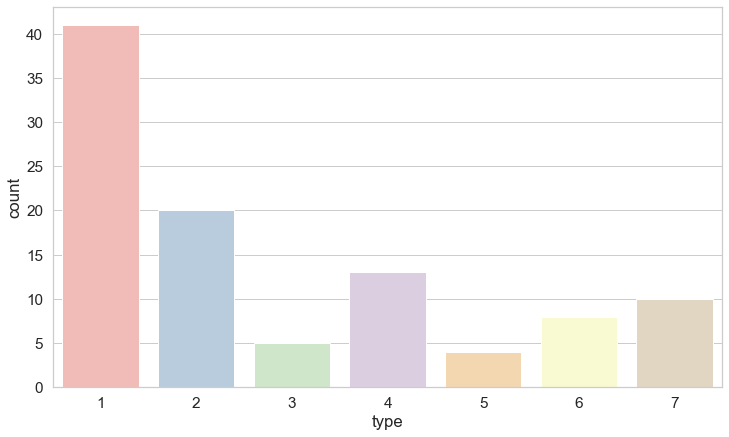

In [11]:
sn.set(style = 'whitegrid', font_scale = 1.4)
plt.subplots(figsize = (12,7))
sn.countplot(x = 'type', data = zoo, palette = 'Pastel1')

#### We can see the count of type 1 is very high

### Separating feature data and Label data and train-test split
#### We will separate the class label data (type) and features data as Y and X respectively. Also, we will split the dataset into training and test data


In [12]:
Y = zoo['type']
Y.head()

0    1
1    1
2    4
3    1
4    1
Name: type, dtype: int64

In [13]:
X = zoo.drop('type',axis=1)

In [14]:
X = zoo.drop('animal name',axis=1)
X.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,tail,domestic,catsize,type,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
0,1,0,0,1,0,0,1,1,1,1,...,0,0,1,1,0,0,1,0,0,0
1,1,0,0,1,0,0,0,1,1,1,...,1,0,1,1,0,0,1,0,0,0
2,0,0,1,0,0,1,1,1,1,0,...,1,0,0,4,1,0,0,0,0,0
3,1,0,0,1,0,0,1,1,1,1,...,0,0,1,1,0,0,1,0,0,0
4,1,0,0,1,0,0,1,1,1,1,...,1,0,1,1,0,0,1,0,0,0


In [15]:
X = X.drop('type',axis=1)

In [16]:
X.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,fins,tail,domestic,catsize,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
0,1,0,0,1,0,0,1,1,1,1,...,0,0,0,1,0,0,1,0,0,0
1,1,0,0,1,0,0,0,1,1,1,...,0,1,0,1,0,0,1,0,0,0
2,0,0,1,0,0,1,1,1,1,0,...,1,1,0,0,1,0,0,0,0,0
3,1,0,0,1,0,0,1,1,1,1,...,0,0,0,1,0,0,1,0,0,0
4,1,0,0,1,0,0,1,1,1,1,...,0,1,0,1,0,0,1,0,0,0


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, random_state = 30, stratify = Y)

In [18]:
X_train.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,fins,tail,domestic,catsize,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
20,0,1,1,0,1,0,0,0,1,1,...,0,1,1,0,0,1,0,0,0,0
64,1,0,0,1,0,0,1,1,1,1,...,0,1,0,1,0,0,1,0,0,0
90,0,0,1,0,0,0,0,0,1,1,...,0,1,0,1,0,0,1,0,0,0
59,0,1,1,0,1,0,0,0,1,1,...,0,1,0,0,0,1,0,0,0,0
30,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [19]:
X_test.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,fins,tail,domestic,catsize,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
46,0,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
79,0,1,1,0,1,1,1,0,1,1,...,0,1,0,0,0,1,0,0,0,0
23,0,1,1,0,1,0,0,0,1,1,...,0,1,0,1,0,1,0,0,0,0
60,0,0,1,0,0,1,1,1,1,0,...,1,1,0,1,1,0,0,0,0,0
97,1,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [20]:
Y_train.head()

20    2
64    1
90    3
59    2
30    6
Name: type, dtype: int64

In [21]:
Y_test.head()

46    7
79    2
23    2
60    4
97    6
Name: type, dtype: int64

### Grid search for Algorithm Tuning

In [22]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39])}

In [23]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=10)
grid.fit(X_train, Y_train)
print(grid.best_params_)

C:\Users\Vishal\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Vishal\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Vishal\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Vishal\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Vishal\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Vishal\anaconda3\lib\site-packages\sklearn\base

{'n_neighbors': 1}


C:\Users\Vishal\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Vishal\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Vishal\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Vishal\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Vishal\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Vishal\anaconda3\lib\site-packages\sklearn\base.py:441: 

#### After applying GridSearch, we got the best K (n_neighbors) value as 1, so we will be using the k= 1 for KNN Classifier algorithm
### Visualizing CV results

C:\Users\Vishal\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Vishal\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Vishal\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Vishal\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Vishal\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Vishal\anaconda3\lib\site-packages\sklearn\base

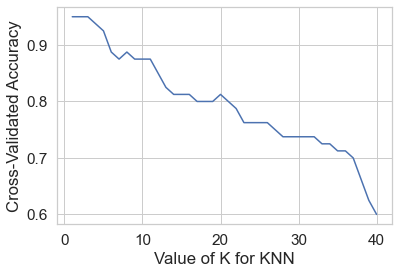

In [24]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

#### We could see that the model accuracy is very good for k values smaller than 5 and as the value increases the accuracy goes on decreasing
### Using KNN Classifier for prediction

In [25]:
model = KNeighborsClassifier(n_neighbors =1).fit(X_train,Y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred)
print(accuracy)

0.9523809523809523


C:\Users\Vishal\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


#### We can see that the accuracy score which we have got for our model is 0.76 which is 76%. It is decent accuracy score. But the accuracy score can be misleading for imbalanced data. So we will use confusion matrix and classification report metrics further

In [26]:
confusion_matrix = confusion_matrix(Y_test,y_pred)
print (confusion_matrix)

[[8 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 2]]


In [27]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         3
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.95        21
   macro avg       0.79      0.86      0.81        21
weighted avg       0.93      0.95      0.94        21



C:\Users\Vishal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vishal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vishal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### The precison and f1 score for type 5 is low. Since the data is imbalanced, we can see the precision values are affected. We will use oversamping technique as the data is very less and undersampling will cause data loss
### Using Over Sampling for balancing the data
#### We will use RandomOverSampler (ROS) for sampling the the data to balance our data

In [28]:
ros = RandomOverSampler(random_state = 30)

#### Fitting the data using ROS

In [29]:
x_resample, y_resample = ros.fit_resample(X, Y)
y_df = pd.DataFrame(y_resample)

In [30]:
y_df.value_counts()

type
7       41
6       41
5       41
4       41
3       41
2       41
1       41
dtype: int64

#### We could see the data is resampled now and all the type values are 41 now. Previously only type 1 was 41. We will split the resampled data into training and test data and build a KNN model

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(x_resample, y_resample, test_size = .2, random_state = 30, stratify = y_resample)

### Using GridSearch for Algorithm Tuning after resampling

In [32]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=10)
grid.fit(X_train, Y_train)
print(grid.best_params_)

C:\Users\Vishal\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Vishal\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Vishal\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Vishal\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Vishal\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Vishal\anaconda3\lib\site-packages\sklearn\base.py:441: 

{'n_neighbors': 1}


C:\Users\Vishal\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Vishal\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Vishal\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Vishal\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Vishal\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Vishal\anaconda3\lib\site-packages\sklearn\base.py:441: 

{'n_neighbors': 1}

#### After applying GridSearch, we got the best K (n_neighbors) value as 1, so we will be using the k= 1 for KNN Classifier algorithm
### Visualizing the accuracy with different k values on sampled data

C:\Users\Vishal\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Vishal\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Vishal\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Vishal\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Vishal\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Vishal\anaconda3\lib\site-packages\sklearn\base.py:441: 

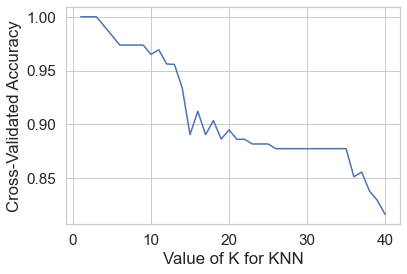

In [33]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

#### The accuracy value is high for low values of k (less than 5) and it descreases as we increase values of k
### Using KNN with k=1 for model classification
#### We had identified the k=1 is best parameter with GridSearch so using k as 1

In [34]:
model = KNeighborsClassifier(n_neighbors =1).fit(X_train,Y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred)
print(accuracy)

1.0


C:\Users\Vishal\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


#### The accuracy is 1 which is 100% after applying sampling. We will use confusion matrix and classification report to further check our accuracy

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test,y_pred)
print (confusion_matrix)

[[8 0 0 0 0 0 0]
 [0 8 0 0 0 0 0]
 [0 0 8 0 0 0 0]
 [0 0 0 8 0 0 0]
 [0 0 0 0 8 0 0]
 [0 0 0 0 0 9 0]
 [0 0 0 0 0 0 9]]


In [36]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         9

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



#### We could see the precision and recall values is 1 for all 7 types which is an excellent score.